In [1]:
# load modules

import os
import pandas as pd
import numpy as np
import statistics
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Current current working directory
os.getcwd()

'/Users/oliver/Desktop/Babson Data Analytics Competition/Notebooks'

In [3]:
# List files in current working directory
os.listdir()

['Content_Rec_Exploratory data analysis.ipynb',
 "SupplierData Analysis - Jimmy's part.ipynb",
 'Babson data.ipynb',
 'merged_data_analysis_rm.ipynb',
 'Babson Data.pdf',
 '.ipynb_checkpoints',
 'ModuleCountData Exploratory Analysis.ipynb']

In [4]:
os.listdir("../Data/Base data")

['ContentRecommendationData.csv', 'SupplierData.csv', 'ModuleCountData.csv']

In [5]:
# Base data
content  = pd.read_csv("../Data/Base data/ContentRecommendationData.csv")
supplier = pd.read_csv("../Data/Base data/SupplierData.csv")
modules  = pd.read_csv("../Data/Base data/ModuleCountData.csv")

In [6]:
# Contect data
content.head()

,prsku,clid,percentilerank,biccontenttypename,hasbiccontenttype
0,AACF1003,15,NaN,Materials / How Its Made,0
1,AACF1020,15,NaN,Warranty & Guarantees,0
2,AACF1025,15,NaN,Materials / How Its Made,0
3,AACF1042,15,NaN,Relative Size & Fit,0
4,AACF1057,15,NaN,Materials / How Its Made,0


In [7]:
# Supplier data
supplier.head()

,prsku,soid,soname,clid,clname,mkcname,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank,expectedgrs
0,AAAM1028,3,Wayfair UK,21,Cribs,Nursery,1,0,0,0,14,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
1,AABK1087,4,Wayfair DE,18,Mattress Toppers and Pads,Mattresses - Utility Bedding,7080,0,45,5,1362,1,0,265.558272,857.66493,3759.433838,6547.578930,NaN,NaN,NaN
2,AACE1000,6,Wayfair CA,15,Area Rugs,Rugs,1,0,0,0,0,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN
3,AACF1003,3,Wayfair UK,15,Area Rugs,Rugs,4312,0,0,0,25,1,0,0.000000,0.00000,0.000000,342.437186,NaN,NaN,NaN
4,AACF1005,3,Wayfair UK,15,Area Rugs,Rugs,1,0,1,0,7,1,0,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN


In [8]:
# Module count data
modules.head()

,prsku,modulecount,clid,clname,mkcname
0,AAOJ1497,1,34,Wall Art,Wall Art
1,ACFT1051,1,9,Bar Stools,Furniture - Kitchen and Dining
2,ACOT1466,1,34,Wall Art,Wall Art
3,ACOT4005,1,15,Area Rugs,Rugs
4,ACOT4710,4,15,Area Rugs,Rugs


In [9]:
# Merge data
merged_ads = pd.merge(left = modules, right = content, how = 'left', left_on = 'prsku', right_on = 'prsku')
merged_ads.head()

,prsku,modulecount,clid_x,clname,mkcname,clid_y,percentilerank,biccontenttypename,hasbiccontenttype
0,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Visual Details,1
1,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Dimensions,0
2,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Relative Size & Fit,0
3,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Product Feature,0
4,ACFT1051,1,9,Bar Stools,Furniture - Kitchen and Dining,9,NaN,Dimensions,0


In [10]:
merged_all = pd.merge(left = merged_ads, right = supplier, how='left', left_on='prsku', right_on='prsku')
merged_all.head()

,prsku,modulecount,clid_x,clname_x,mkcname_x,clid_y,percentilerank_x,biccontenttypename,hasbiccontenttype,soid,...,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,percentilerank_y,expectedgrs
0,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Visual Details,1,1,...,7,1,0,0.0000,0.000000,0.000000,175.770600,1.68,0.99,653.4692
1,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Visual Details,1,6,...,1,1,0,0.0000,0.000000,0.000000,0.000000,1.68,0.99,653.4692
2,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Visual Details,1,2,...,82,1,0,330.8612,1438.115306,1438.115306,1438.115306,1.68,0.99,653.4692
3,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Visual Details,1,1,...,11,0,0,0.0000,0.000000,0.000000,175.770600,1.68,0.99,653.4692
4,AAOJ1497,1,34,Wall Art,Wall Art,34,0.99,Visual Details,1,7,...,125,0,0,322.4012,793.313000,793.313000,793.313000,1.68,0.99,653.4692


In [11]:
merged_all.columns

Index(['prsku', 'modulecount', 'clid_x', 'clname_x', 'mkcname_x', 'clid_y',
       'percentilerank_x', 'biccontenttypename', 'hasbiccontenttype', 'soid',
       'soname', 'clid', 'clname_y', 'mkcname_y', 'suid', 'iswaymore',
       'addedtocart', 'placedorder', 'trafficcount', 'iscurrent', 'videocount',
       'grs1month', 'grs2month', 'grs3month', 'grs12month', 'weightedavgscore',
       'percentilerank_y', 'expectedgrs'],
      dtype='object')

In [12]:
merged_all.drop(['clid_y','clname_y','mkcname_y','percentilerank_y'], axis = 1, inplace = True)
merged_all = merged_all.rename(columns={'clid_x': 'clid','clname_x':'clname','mkcname_x':'mkcname','percentilerank_x':'percentilerank'})

In [13]:
# column names
merged_all.columns

Index(['prsku', 'modulecount', 'clid', 'clname', 'mkcname', 'percentilerank',
       'biccontenttypename', 'hasbiccontenttype', 'soid', 'soname', 'clid',
       'suid', 'iswaymore', 'addedtocart', 'placedorder', 'trafficcount',
       'iscurrent', 'videocount', 'grs1month', 'grs2month', 'grs3month',
       'grs12month', 'weightedavgscore', 'expectedgrs'],
      dtype='object')

In [14]:
# data dypes
merged_all.dtypes

prsku                  object
modulecount             int64
clid                    int64
clname                 object
mkcname                object
percentilerank        float64
biccontenttypename     object
hasbiccontenttype       int64
soid                    int64
soname                 object
clid                    int64
suid                    int64
iswaymore               int64
addedtocart             int64
placedorder             int64
trafficcount            int64
iscurrent               int64
videocount              int64
grs1month             float64
grs2month             float64
grs3month             float64
grs12month            float64
weightedavgscore      float64
expectedgrs           float64
dtype: object

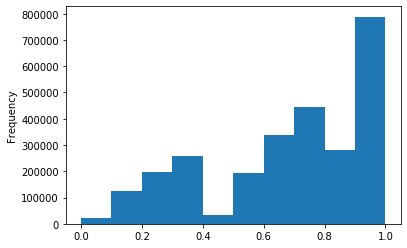

In [15]:
merged_all.percentilerank.plot.hist()

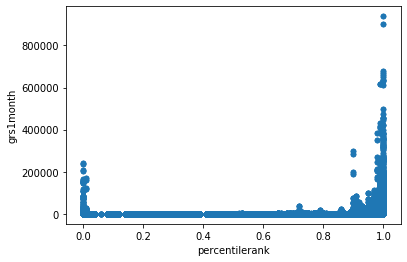

In [16]:
merged_all.plot.scatter(x='percentilerank',y ='grs1month')

In [17]:
merged_all.shape

(4473936, 24)

In [131]:
# Sample a fraction of data for analysis
df_sample = merged_all.sample(frac =0.001)
df_sample.shape

(4474, 24)

In [51]:
df_sample['iswaymore'].value_counts()

1    4419
0      55
Name: iswaymore, dtype: int64

In [57]:
df_sample.describe()

,modulecount,clid,percentilerank,hasbiccontenttype,soid,clid,suid,iswaymore,addedtocart,placedorder,trafficcount,iscurrent,videocount,grs1month,grs2month,grs3month,grs12month,weightedavgscore,expectedgrs
count,4474.000000,4474.000000,2680.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4474.000000,4.474000e+03,2498.000000,2498.000000
mean,6.546044,25.041797,0.678619,0.396737,3.500894,25.041797,488.386008,0.989271,11.757935,1.643943,184.829683,0.509835,0.162718,321.387026,716.591269,1075.002623,4.346859e+03,1.177670,4040.752530
std,11.288852,10.463388,0.272226,0.489275,2.558176,10.463388,1556.643793,0.103034,68.854852,12.437816,965.582045,0.499959,0.475075,2322.722381,5193.619306,7635.916119,3.979042e+04,0.378547,23589.562249
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.350000,0.000000
25%,2.000000,15.000000,0.520000,0.000000,1.000000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.900000,81.686000
50%,3.000000,34.000000,0.720000,0.000000,3.000000,34.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.100000,374.195200
75%,5.000000,34.000000,0.910000,1.000000,6.000000,34.000000,111.000000,1.000000,2.000000,0.000000,34.000000,1.000000,0.000000,0.000000,0.000000,38.945200,3.795902e+02,1.370000,1375.409200
max,60.000000,48.000000,1.000000,1.000000,8.000000,48.000000,12674.000000,1.000000,2062.000000,446.000000,20951.000000,1.000000,8.000000,57585.804454,138152.539874,190199.121446,1.921397e+06,2.620000,882987.251600


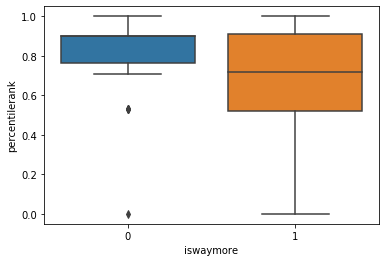

In [58]:
p1 = sns.boxplot(x="iswaymore", y="percentilerank", data=df_sample)

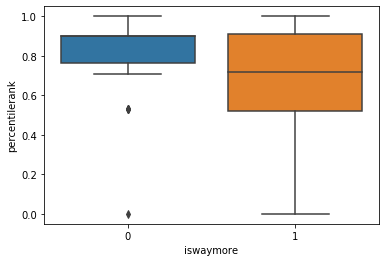

In [59]:
p1 = sns.boxplot(x="iswaymore", y="percentilerank", data=df_sample)


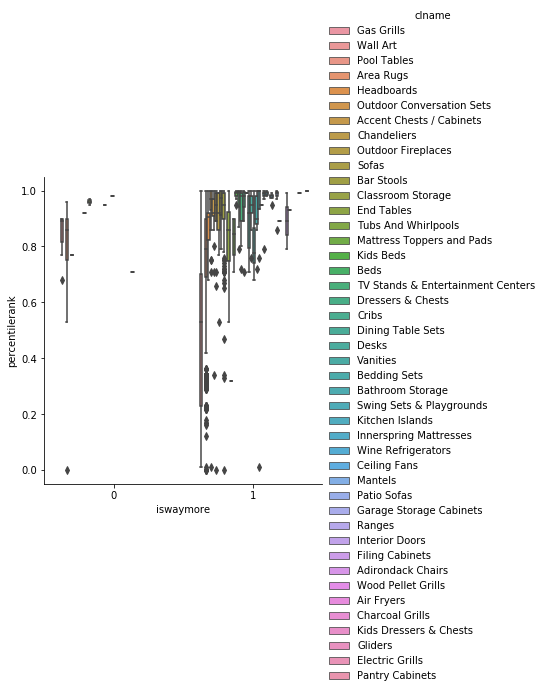

In [23]:
sns.catplot(x= "iswaymore", y= "percentilerank", hue="clname", kind="box", data=df_sample)

In [147]:
# Select relevant features only
df_sample = df_sample[['iswaymore', 'modulecount', 'percentilerank', 'biccontenttypename','hasbiccontenttype', 'addedtocart', 'placedorder', 'trafficcount','grs1month', 'weightedavgscore', 'expectedgrs']]
df_sample.shape

(4474, 11)

In [146]:
df_sample.dtypes
# df_sample['clname'].unique()

iswaymore               int64
modulecount             int64
clname                 object
percentilerank        float64
biccontenttypename     object
hasbiccontenttype       int64
soname                 object
addedtocart             int64
placedorder             int64
trafficcount            int64
grs1month             float64
weightedavgscore      float64
expectedgrs           float64
dtype: object

In [133]:
# Check NAs
df_sample.isnull().sum()

iswaymore                0
modulecount              0
clname                   0
percentilerank        1796
biccontenttypename       0
hasbiccontenttype        0
soname                   0
addedtocart              0
placedorder              0
trafficcount             0
grs1month                0
weightedavgscore      1971
expectedgrs           1971
dtype: int64

In [134]:
# Median imputation
df_sample = df_sample.fillna(df_sample.median())

In [135]:
# Check NAs
df_sample.isnull().sum()

iswaymore             0
modulecount           0
clname                0
percentilerank        0
biccontenttypename    0
hasbiccontenttype     0
soname                0
addedtocart           0
placedorder           0
trafficcount          0
grs1month             0
weightedavgscore      0
expectedgrs           0
dtype: int64

In [155]:
# choose features and target
x = df_sample[['modulecount', 'percentilerank','hasbiccontenttype', 'addedtocart', 'placedorder', 'trafficcount','grs1month','weightedavgscore', 'expectedgrs']]
y = df_sample['iswaymore']

In [156]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [140]:
# One hot encoding
# 1. INSTANTIATE
enc = OneHotEncoder(handle_unknown='ignore')

# 2. FIT
enc.fit(x_train)
enc.fit(x_test)

# 3. Transform
onehot_x_train = enc.transform(x_train).toarray()
onehot_x_test = enc.transform(x_test).toarray()

In [141]:
# Logistic regression
logisticMod = LogisticRegression(penalty='l2',C=1.0,solver="lbfgs",max_iter=500)
logisticMod.fit(onehot_x_train,y_train)
print('Logistic (Train/Test) accuracy')
print(logisticMod.score(onehot_x_train,y_train))
print(logisticMod.score(onehot_x_test,y_test))

Logistic (Train/Test) accuracy
0.9868678401788209
0.9910614525139665


In [157]:
# Logistic regression
logisticMod = LogisticRegression(penalty='l2',C=1.0,solver="lbfgs",max_iter=500)
logisticMod.fit(x_train,y_train)
print('Logistic (Train/Test) accuracy')
print(logisticMod.score(x_train,y_train))
print(logisticMod.score(x_test,y_test))

Logistic (Train/Test) accuracy
0.985470801899972
0.9854748603351955


In [159]:
logisticMod.coef_

array([[ 1.51938507e+00,  2.05148998e-01,  9.70148910e-02,
         5.13321647e-02, -1.10429014e-01, -1.39987153e-03,
        -1.21204283e-04,  3.67128042e-01, -6.10512550e-06]])